In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 101)

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [ ]:
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [ ]:

data.isnull().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [ ]:
print(f"before droping shape: {df.shape}")
df = pd.read_csv('train.csv', sep=',').dropna()

before droping shape: (2194, 12)


In [ ]:
df.isnull().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

In [ ]:
df.shape

(2194, 12)

Text(0, 0.5, 'Frequency')

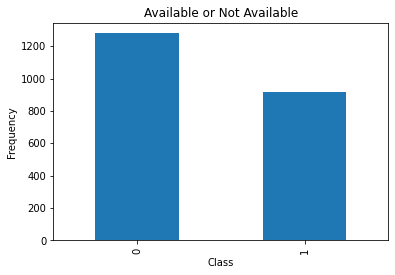

In [ ]:
count_classes = pd.value_counts(df['yearly_availability'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Available or Not Available")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
data=data.fillna(data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
data.isnull().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

In [ ]:
# Region: string to categorical int
# df['region']=df['region'].astype('category').cat.codes
# df['accommodation_type']=df['accommodation_type'].astype('category').cat.codes
for col in ["region", "accommodation_type", 'id', 'owner_id']:
    data[col]=data[col].astype('category').cat.codes

# print(df)

In [ ]:
from tabulate import tabulate
print(data.columns)
print(tabulate(data.head()))
(data)

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')
-  ----  -  -------  --------  -  ---  --  ---  ------  ----  --  -
0   618  2  40.7185  -74.0044  0  170   5    7  0.56     141   1  0
1    21  1  40.6445  -73.9503  0   65   3  238  2.3       59   1  0
2   887  3  40.7857  -73.8106  1   85   1    0  1.1575   984   1  1
3  1803  2  40.7386  -73.98    1  210  30    0  1.1575  2085  65  1
4    31  2  40.8243  -73.9463  2   75   3   38  0.42     119   3  1
-  ----  -  -------  --------  -  ---  --  ---  ------  ----  --  -


,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,618,2,40.71854,-74.00439,0,170,5,7,0.560000,141,1,0
1,21,1,40.64446,-73.95030,0,65,3,238,2.300000,59,1,0
2,887,3,40.78573,-73.81062,1,85,1,0,1.157502,984,1,1
3,1803,2,40.73863,-73.98002,1,210,30,0,1.157502,2085,65,1
4,31,2,40.82426,-73.94630,2,75,3,38,0.420000,119,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,2793,2,40.74316,-73.98038,1,400,2,0,1.157502,2360,1,1
2866,1063,2,40.73523,-73.99465,1,180,3,2,0.070000,1735,1,1
2867,1147,2,40.76619,-73.98987,0,179,3,17,0.670000,768,1,0
2868,772,2,40.74637,-73.97207,1,200,30,0,1.157502,326,49,1


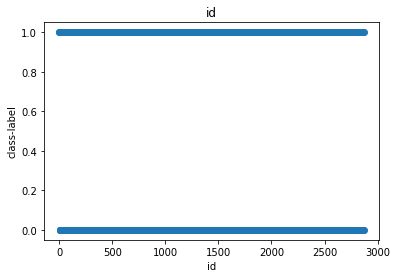

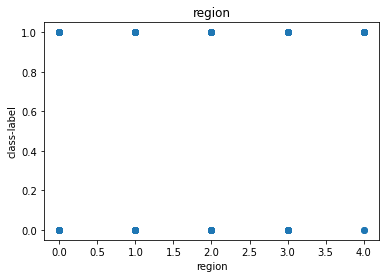

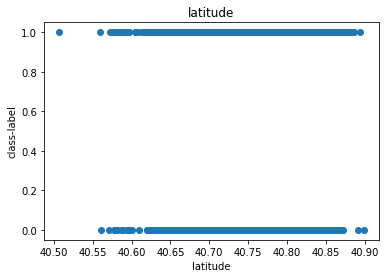

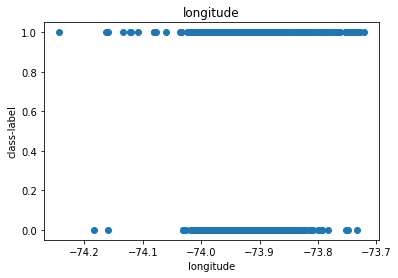

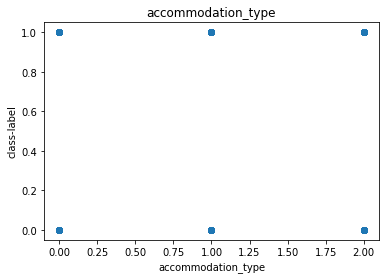

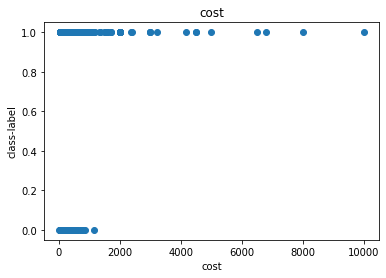

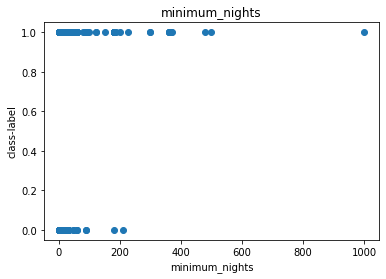

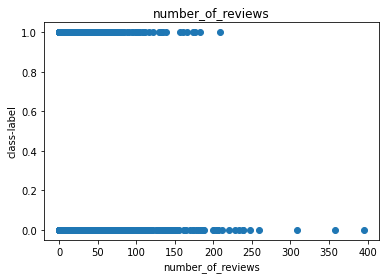

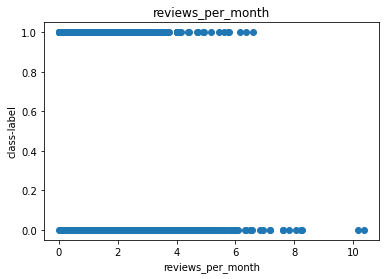

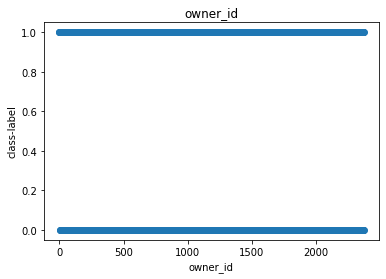

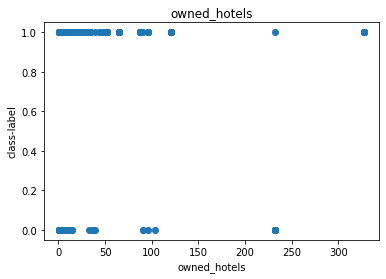

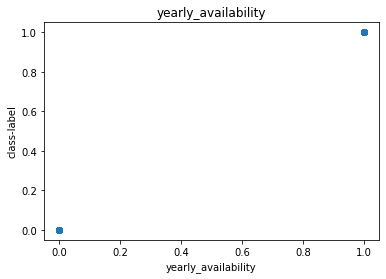

<Figure size 432x288 with 0 Axes>

In [ ]:
# count_classes = pd.value_counts(df['yearly_availability'], sort = True).sort_index()
# count_classes.plot(kind = 'bar')
for col in data.columns:
    plt.scatter(data[col], data['yearly_availability'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("class-label")
    plt.show()
    plt.clf()

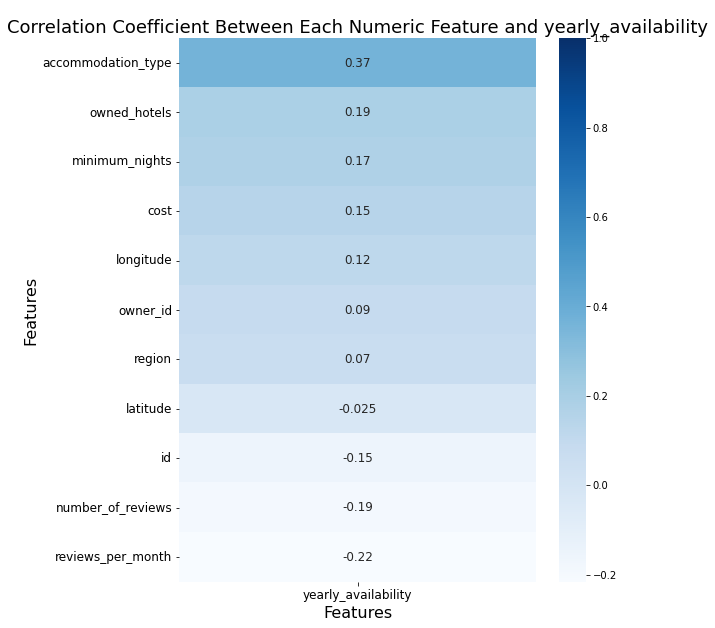

In [ ]:
# Visualizing correlation coefficients between features and yearly_availability:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['yearly_availability']].sort_values('yearly_availability', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and yearly_availability', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train = data.drop(columns=['yearly_availability','reviews_per_month'])
y_train = data['yearly_availability']

In [ ]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [ ]:
test_data=test_data.fillna(test_data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
for col in ["region", "accommodation_type", 'id', 'owner_id']:
    test_data[col]=test_data[col].astype('category').cat.codes
test_data.head(10)

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,214,1,40.70912,-73.94513,2,135,2,22,0.660000,116,1
1,474,1,40.57646,-73.96641,0,69,2,8,0.900000,540,2
2,550,2,40.76616,-73.98228,1,225,30,0,1.200385,214,12
3,415,2,40.77668,-73.94587,2,125,30,9,0.820000,159,1
4,338,2,40.80279,-73.94450,0,43,1,13,0.720000,456,2
5,488,2,40.71161,-74.00665,1,57,9,3,0.360000,410,2
6,382,2,40.83856,-73.94411,0,65,3,23,1.650000,99,1
7,314,2,40.80791,-73.94700,1,97,2,5,0.260000,143,1
8,256,1,40.71232,-73.96067,0,88,4,6,0.240000,156,1
9,266,1,40.67602,-73.96593,0,225,5,0,1.200385,202,2


In [ ]:
import numpy as np
X_test = test_data.drop(columns=['reviews_per_month'])
y_test = np.ones(len(test_data)) # random intialization

In [ ]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)
# Scoring 
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')

Best Training Accuracy: 0.7599303135888502
Best Testing Accuracy: 0.6253481894150418


In [ ]:
for col in df.columns:
    if col == "yearly_availability": continue;
    X_train = data.drop(columns=['yearly_availability',col])
    y_train = data['yearly_availability']
    X_test = test_data.drop(columns=[col])
    y_test = np.ones(len(test_data)) # random intialization
    # Construct Grid Parameters
    lg_params = {
        'penalty': ['l1'], 
        'C': [3.5],
        'max_iter': [300]
    }

    # Perform Grid Search
    lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                    lg_params,
                    cv = 5,
                    scoring = 'accuracy')
    lg = lg_gs.fit(X_train, y_train)
    # Scoring 
    print(col, "dropped")
    print(f'\tBest Training Accuracy: {lg.score(X_train, y_train)}')
    print(f'\tBest Testing Accuracy: {lg.score(X_test, y_test)}')

id dropped
	Best Training Accuracy: 0.6951219512195121
	Best Testing Accuracy: 0.3816155988857939
region dropped
	Best Training Accuracy: 0.7602787456445993
	Best Testing Accuracy: 0.6225626740947076
latitude dropped
	Best Training Accuracy: 0.7602787456445993
	Best Testing Accuracy: 0.6253481894150418
longitude dropped
	Best Training Accuracy: 0.7606271777003484
	Best Testing Accuracy: 0.6253481894150418
accommodation_type dropped
	Best Training Accuracy: 0.6996515679442509
	Best Testing Accuracy: 0.5292479108635098
cost dropped
	Best Training Accuracy: 0.7501742160278746
	Best Testing Accuracy: 0.6545961002785515
minimum_nights dropped
	Best Training Accuracy: 0.7494773519163763
	Best Testing Accuracy: 0.6434540389972145
number_of_reviews dropped
	Best Training Accuracy: 0.7578397212543554
	Best Testing Accuracy: 0.5389972144846796
reviews_per_month dropped
	Best Training Accuracy: 0.7599303135888502
	Best Testing Accuracy: 0.6253481894150418
owner_id dropped
	Best Training Accuracy:

In [ ]:
X_train = data.drop(columns=['yearly_availability','cost', 'minimum_nights','owner_id', 'region', 'latitude', 'longitude', 'owned_hotels', 'reviews_per_month'])
y_train = data['yearly_availability']
X_test = test_data.drop(columns=['cost', 'minimum_nights','owner_id', 'latitude', 'region', 'longitude', 'owned_hotels', 'reviews_per_month'])
y_test = np.ones(len(test_data)) # random intialization
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                lg_params,
                cv = 5,
                scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)
# Scoring 
print('cost', 'minimum_nights','owner_id', 'latitude', 'region', 'longitude', 'owned_hotels', 'reviews_per_month', "dropped")
print(f'\tBest Training Accuracy: {lg.score(X_train, y_train)}')
print(f'\tBest Testing Accuracy: {lg.score(X_test, y_test)}')

cost minimum_nights owner_id latitude region longitude owned_hotels reviews_per_month dropped
	Best Training Accuracy: 0.6885017421602787
	Best Testing Accuracy: 0.7367688022284122


In [ ]:
X_train = data.drop(columns=['yearly_availability','cost', 'minimum_nights','owner_id'])
y_train = data['yearly_availability']
X_test = test_data.drop(columns=['cost', 'minimum_nights','owner_id'])
y_test = np.ones(len(test_data)) # random intialization
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                lg_params,
                cv = 5,
                scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)
# Scoring 
print('cost', 'minimum_nights','owner_id', "dropped")
print(f'\tBest Training Accuracy: {lg.score(X_train, y_train)}')
print(f'\tBest Testing Accuracy: {lg.score(X_test, y_test)}')


cost minimum_nights owner_id dropped
	Best Training Accuracy: 0.6930313588850174
	Best Testing Accuracy: 0.6838440111420613


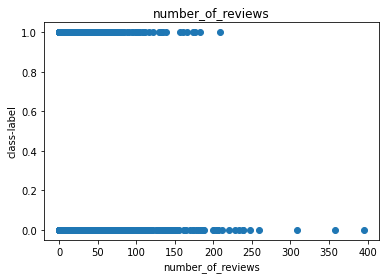

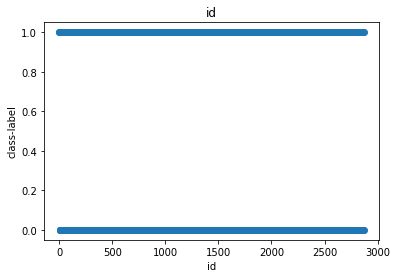

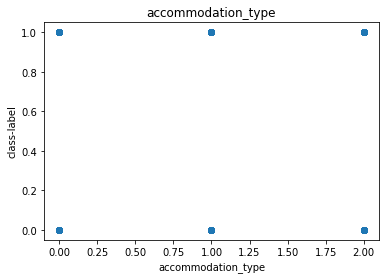

<Figure size 432x288 with 0 Axes>

In [ ]:
for col in ['number_of_reviews','id','accommodation_type']:
    plt.scatter(data[col], data['yearly_availability'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("class-label")
    plt.show()
    plt.clf()

In [ ]:
data['yearly_availability'][data['yearly_availability']==1]


2       1
3       1
4       1
5       1
9       1
       ..
2864    1
2865    1
2866    1
2868    1
2869    1
Name: yearly_availability, Length: 1431, dtype: int64

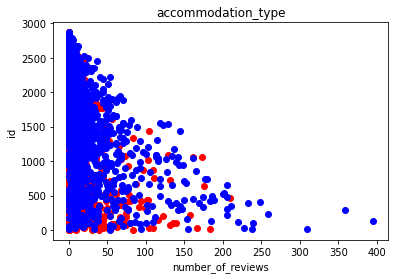

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.scatter(data['number_of_reviews'][data['yearly_availability']==1], data['id'][data['yearly_availability']==1], color= 'r')
plt.scatter(data['number_of_reviews'][data['yearly_availability']==0], data['id'][data['yearly_availability']==0], color= 'b')
plt.title(col)
plt.xlabel("number_of_reviews")
plt.ylabel('id')
plt.show()
plt.clf()

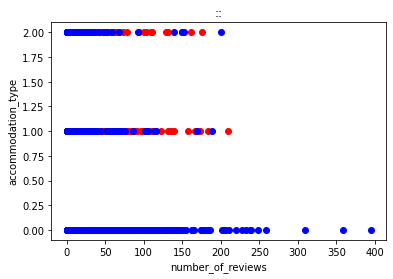

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.scatter(data['number_of_reviews'][data['yearly_availability']==1], data['accommodation_type'][data['yearly_availability']==1], color= 'r')
plt.scatter(data['number_of_reviews'][data['yearly_availability']==0], data['accommodation_type'][data['yearly_availability']==0], color= 'b')
plt.title("::")
plt.xlabel("number_of_reviews")
plt.ylabel("accommodation_type")
plt.show()
plt.clf()

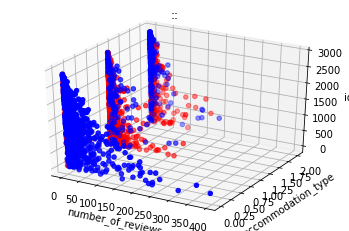

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter(data['number_of_reviews'][data['yearly_availability']==1], data['accommodation_type'][data['yearly_availability']==1], data['id'][data['yearly_availability']==1], color= 'r')
ax.scatter(data['number_of_reviews'][data['yearly_availability']==0], data['accommodation_type'][data['yearly_availability']==0], data['id'][data['yearly_availability']==0], color= 'b')
plt.title("::")
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('accommodation_type')
ax.set_zlabel('id')
# plt.xlabel("number_of_reviews")
# plt.ylabel("accommodation_type")
plt.show()
plt.clf()